In [23]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'./../src')


import methods
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy

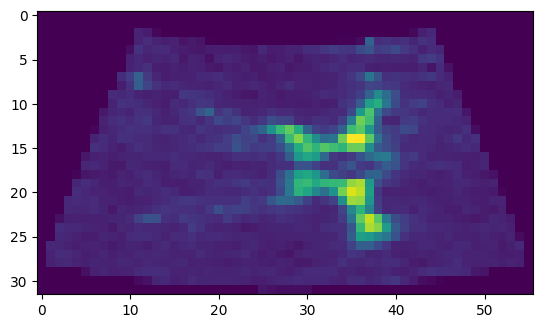

In [19]:
OUTPUT_PATH = "3d/"
CASE_NAME = "3DTEST"


img_array, sh = methods.pd_3d(zoom = 0.3)
mask_array = img_array > 0

vis_offset = +0
plt.imshow(img_array[:,int(.5*img_array.shape[1])+vis_offset,:])

In [20]:
dist_sig = 1,
intensity_sig = 20

In [51]:
# CREATE ImageGraph

wf = methods.WeightKernel(
    dist_sig = 1,
    intensity_sig = 100
)

# problem with mask?
G = methods.ImageGraph(
    img_array, 
    mask_array=mask_array, 
    wf=wf, 
    neighbour_depth = 2, 
    cmap='viridis'
    )

In [52]:
nx.write_gexf(G,OUTPUT_PATH+CASE_NAME+"_eps"+str(intensity_sig)+".gexf")

In [53]:
N = nx.normalized_laplacian_matrix(G)


In [54]:
vals, vecs = scipy.sparse.linalg.eigs(N,which='SR')

In [55]:
plot_array = G._node_vec_to_img_array(np.real(vecs[:,1]))

# re2 = np.transpose(np.real(vecs[:,0].reshape(sh[1],sh[0]))) # order?
# plt.imshow(re2, cmap='bwr')
# plt.imshow(plot_array, cmap='bwr')

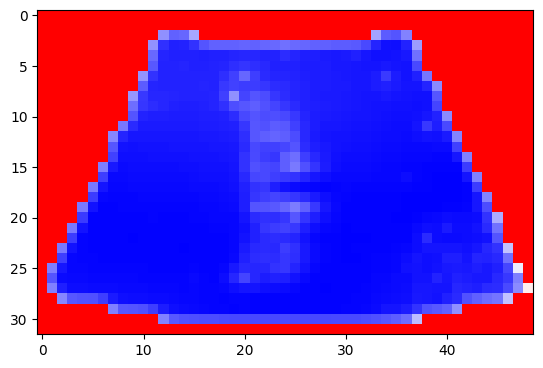

In [56]:
vis_offset = +8
plt.imshow(plot_array[int(.5*plot_array.shape[0])+vis_offset,:,:], cmap='bwr')

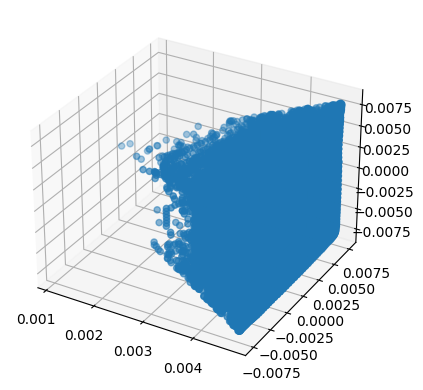

In [59]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(np.real(vecs[:,0]), np.real(vecs[:,1]), np.real(vecs[:,2]))